In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [3]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 100
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [4]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids


In [5]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [6]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

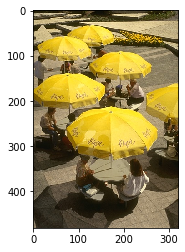

In [7]:
image_data=plt.imread('242078.jpg')
image_data.shape
plt.imshow(image_data)

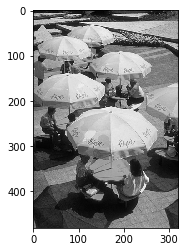

In [12]:
from skimage.color import rgb2gray
image_data = rgb2gray(image_data)
plt.imshow(image_data, cmap='gray')

In [13]:
image_data

array([[0.1147749 , 0.12261804, 0.16827804, ..., 0.29231608, 0.30914118,
        0.35449569],
       [0.09908863, 0.09516706, 0.12514078, ..., 0.36404314, 0.40325882,
        0.39371137],
       [0.07948078, 0.09908863, 0.08984667, ..., 0.37972941, 0.35032902,
        0.36404314],
       ...,
       [0.53764863, 0.52560118, 0.47264863, ..., 0.22622275, 0.22230118,
        0.2164302 ],
       [0.50627608, 0.53372706, 0.51578588, ..., 0.2066149 , 0.23406588,
        0.22035176],
       [0.51972235, 0.51019765, 0.56089529, ..., 0.20074392, 0.2281949 ,
        0.23211647]])

In [14]:
image_data.shape

(481, 321)

In [15]:
A=image_data

In [16]:
A.shape

(481, 321)

In [17]:
# normalize value ranges
A = A / 255

In [18]:
X = A.reshape((-1, 1))
print(X)
X.shape

[[0.0004501 ]
 [0.00048086]
 [0.00065991]
 ...
 [0.00078723]
 [0.00089488]
 [0.00091026]]


(154401, 1)

In [19]:
#X=A

In [20]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 5)

In [21]:
idx, centroids = run_k_means(X, initial_centroids,5)

In [22]:
# get the closest centroids one last time
#X=A*255
idx = find_closest_centroids(X, centroids)


In [23]:
# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1]))

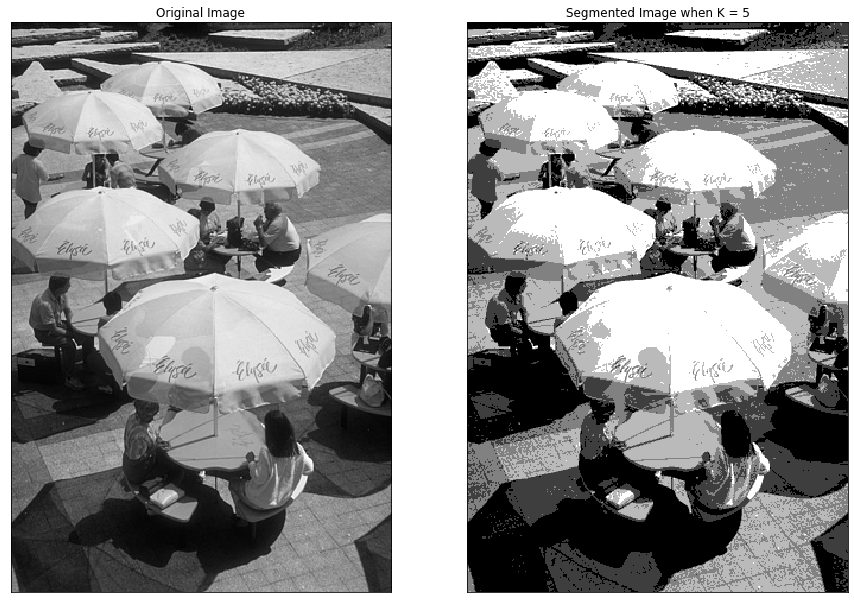

In [24]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image_data,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(X_recovered,cmap='gray')
plt.title('Segmented Image when K = 5' ), plt.xticks([]), plt.yticks([])
plt.show()